In [9]:
df<-read.csv('d:/data/house_regress/data.csv')
head(df) #첫 6행
tail(df) #끝 6행
dim(df)

Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Abbotsford,68 Studley St,2,h,NA,SS,Jellis,3/09/2016,2.5,3067,...,1,1,126,NA,NA,Yarra,-37.8014,144.9958,Northern Metropolitan,4019
Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1,202,NA,NA,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,...,1,0,156,79,1900,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
Abbotsford,18/659 Victoria St,3,u,NA,VB,Rounds,4/02/2016,2.5,3067,...,2,1,0,NA,NA,Yarra,-37.8114,145.0116,Northern Metropolitan,4019
Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,...,2,0,134,150,1900,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067,...,2,1,94,NA,NA,Yarra,-37.7969,144.9969,Northern Metropolitan,4019


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
19735,Williamstown,87 Pasco St,3,h,1285000,S,Jas,29/07/2017,6.8,3016,...,1,1,2010,140,78.00,Whittlesea,-37.68199,145.0174,Western Metropolitan,6380
19736,Windsor,201/152 Peel St,2,u,560000,PI,hockingstuart,29/07/2017,4.6,3181,...,1,1,NA,585,NA,Whittlesea,-37.67681,145.0032,Southern Metropolitan,4380
19737,Wollert,60 Saltlake Bvd,3,h,525300,S,Stockdale,29/07/2017,25.5,3750,...,2,2,NA,333,NA,Darebin,-37.75884,145.0026,Northern Metropolitan,2940
19738,Yarraville,2 Adeney St,2,h,750000,SP,hockingstuart,29/07/2017,6.3,3013,...,2,2,1999,199,140.00,Darebin,-37.75948,144.9962,Western Metropolitan,6543
19739,Yarraville,54 Pentland Pde,6,h,2450000,VB,Village,29/07/2017,6.3,3013,...,2,1,2011,238,118.00,Hume,-37.70322,144.8824,Western Metropolitan,6543
19740,Yarraville,10/127 Somerville Rd,3,t,645000,SP,Jas,29/07/2017,6.3,3013,...,1,1,1980,0,66.32,Hume,-37.69815,144.8802,Western Metropolitan,6543


[1] 19740    21

In [10]:
library(dplyr) #라이브러리 로딩
# 기계학습에 사용할 수 없는 필드들을 제거, '-' 필드 제거
df<-df %>% select(-Suburb,-Address,-Type,-Method,-SellerG,
                 -Date,-CouncilArea,-Regionname)

In [11]:
dim(df) #데이터의 차원

[1] 19740    13

In [12]:
df <-na.omit(df) #결측값이 있는 행들을 제거
tail(df)
dim(df)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
19727,4,821000,16.5,3049,3,2,2,2004,662,232.00,-37.70525,144.7570,2474
19732,3,601000,35.5,3757,3,2,2,1970,779,135.00,-37.76311,145.1049,2170
19735,3,1285000,6.8,3016,2,1,1,2010,140,78.00,-37.68199,145.0174,6380
19738,2,750000,6.3,3013,3,2,2,1999,199,140.00,-37.75948,144.9962,6543
19739,6,2450000,6.3,3013,3,2,1,2011,238,118.00,-37.70322,144.8824,6543
19740,3,645000,6.3,3013,2,1,1,1980,0,66.32,-37.69815,144.8802,6543


[1] 6050   13

In [13]:
summary(df) #기초통계량

     Rooms           Price            Distance        Postcode   
 Min.   :1.000   Min.   : 131000   Min.   : 0.00   Min.   :3000  
 1st Qu.:2.000   1st Qu.: 625000   1st Qu.: 5.90   1st Qu.:3044  
 Median :3.000   Median : 884250   Median : 9.00   Median :3081  
 Mean   :2.925   Mean   :1071520   Mean   : 9.66   Mean   :3102  
 3rd Qu.:4.000   3rd Qu.:1330000   3rd Qu.:12.40   3rd Qu.:3146  
 Max.   :8.000   Max.   :9000000   Max.   :47.40   Max.   :3977  
    Bedroom2        Bathroom          Car            Landsize      
 Min.   :0.000   Min.   :1.000   Min.   : 0.000   Min.   :    0.0  
 1st Qu.:2.000   1st Qu.:1.000   1st Qu.: 1.000   1st Qu.:  158.0  
 Median :3.000   Median :1.000   Median : 1.000   Median :  401.0  
 Mean   :2.899   Mean   :1.574   Mean   : 1.571   Mean   :  556.2  
 3rd Qu.:3.000   3rd Qu.:2.000   3rd Qu.: 2.000   3rd Qu.:  661.0  
 Max.   :9.000   Max.   :8.000   Max.   :10.000   Max.   :37000.0  
  BuildingArea       YearBuilt      Lattitude        Longtitud

In [14]:
cor(df)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.00000000,0.53463030,0.27962928,0.05119844,0.84157314,0.54644647,0.37255092,0.096887269,0.19752555,-0.01920178,0.020388497,0.07405989,-0.122694325
Price,0.53463030,1.00000000,-0.14427829,0.12347889,0.48373602,0.47642527,0.24907287,0.045285947,0.13186511,0.06273046,-0.180191782,0.18149425,-0.048600450
Distance,0.27962928,-0.14427829,1.00000000,0.41096484,0.24201879,0.10087610,0.23838671,0.138506471,0.14595136,-0.19322456,-0.055143454,0.15149058,-0.093605142
Postcode,0.05119844,0.12347889,0.41096484,1.00000000,0.04771559,0.08920162,0.04007828,0.052856923,0.12433363,-0.09197304,-0.352366531,0.36161329,0.063322631
Bedroom2,0.84157314,0.48373602,0.24201879,0.04771559,1.00000000,0.61732399,0.42739817,0.095387324,0.21737907,-0.03936692,0.016208178,0.08884506,-0.116920801
Bathroom,0.54644647,0.47642527,0.10087610,0.08920162,0.61732399,1.00000000,0.33725941,0.067456177,0.17704432,0.01569730,-0.074521265,0.11455666,-0.071313157
Car,0.37255092,0.24907287,0.23838671,0.04007828,0.42739817,0.33725941,1.00000000,0.121483886,0.13310930,-0.03190382,0.015516643,0.05777626,-0.049488823
Landsize,0.09688727,0.04528595,0.13850647,0.05285692,0.09538732,0.06745618,0.12148389,1.000000000,0.15835091,-0.35960473,-0.002857585,0.03257416,-0.003747242
BuildingArea,0.19752555,0.13186511,0.14595136,0.12433363,0.21737907,0.17704432,0.13310930,0.158350906,1.00000000,-0.36175583,-0.016167515,0.04613018,-0.018124988
YearBuilt,-0.01920178,0.06273046,-0.19322456,-0.09197304,-0.03936692,0.01569730,-0.03190382,-0.359604732,-0.36175583,1.00000000,0.023724995,-0.02259983,-0.028540783


In [15]:
(corrmatrix<-cor(df)) #상관계수 행렬

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.00000000,0.53463030,0.27962928,0.05119844,0.84157314,0.54644647,0.37255092,0.096887269,0.19752555,-0.01920178,0.020388497,0.07405989,-0.122694325
Price,0.53463030,1.00000000,-0.14427829,0.12347889,0.48373602,0.47642527,0.24907287,0.045285947,0.13186511,0.06273046,-0.180191782,0.18149425,-0.048600450
Distance,0.27962928,-0.14427829,1.00000000,0.41096484,0.24201879,0.10087610,0.23838671,0.138506471,0.14595136,-0.19322456,-0.055143454,0.15149058,-0.093605142
Postcode,0.05119844,0.12347889,0.41096484,1.00000000,0.04771559,0.08920162,0.04007828,0.052856923,0.12433363,-0.09197304,-0.352366531,0.36161329,0.063322631
Bedroom2,0.84157314,0.48373602,0.24201879,0.04771559,1.00000000,0.61732399,0.42739817,0.095387324,0.21737907,-0.03936692,0.016208178,0.08884506,-0.116920801
Bathroom,0.54644647,0.47642527,0.10087610,0.08920162,0.61732399,1.00000000,0.33725941,0.067456177,0.17704432,0.01569730,-0.074521265,0.11455666,-0.071313157
Car,0.37255092,0.24907287,0.23838671,0.04007828,0.42739817,0.33725941,1.00000000,0.121483886,0.13310930,-0.03190382,0.015516643,0.05777626,-0.049488823
Landsize,0.09688727,0.04528595,0.13850647,0.05285692,0.09538732,0.06745618,0.12148389,1.000000000,0.15835091,-0.35960473,-0.002857585,0.03257416,-0.003747242
BuildingArea,0.19752555,0.13186511,0.14595136,0.12433363,0.21737907,0.17704432,0.13310930,0.158350906,1.00000000,-0.36175583,-0.016167515,0.04613018,-0.018124988
YearBuilt,-0.01920178,0.06273046,-0.19322456,-0.09197304,-0.03936692,0.01569730,-0.03190382,-0.359604732,-0.36175583,1.00000000,0.023724995,-0.02259983,-0.028540783


In [16]:
#강한 양의 상관관계, 강한 음의 상관관계
#강한 양의 상관관계만 출력
corrmatrix[corrmatrix > 0.5 | corrmatrix < -0.5]

[1] 1.0000000 0.5346303 0.8415731 0.5464465 0.5346303 1.0000000 1.0000000
 [8] 1.0000000 0.8415731 1.0000000 0.6173240 0.5464465 0.6173240 1.0000000
[15] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000

Installing package into 'C:/Users/tjoeun302-18/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tjoeun302-18\AppData\Local\Temp\RtmpoPMdfD\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 3.6.2"corrplot 0.84 loaded


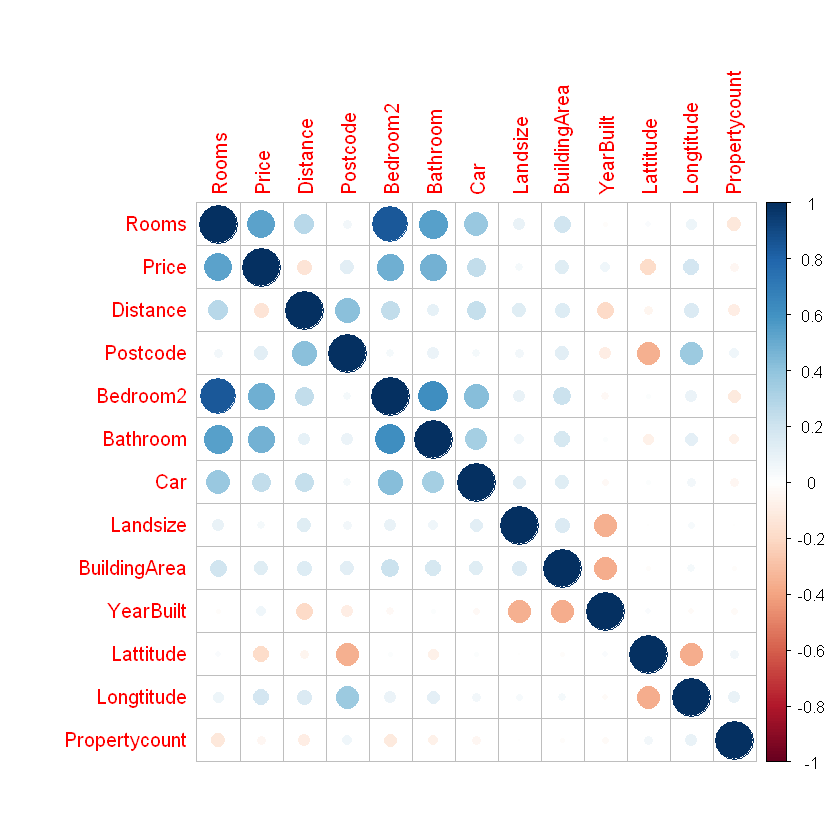

In [18]:
install.packages('corrplot')
library(corrplot)
corrplot(cor(df), method='circle') #상관관계 플롯

In [19]:
(model<-lm(Price ~ . , data=df)) #다중회귀분석 모형


Call:
lm(formula = Price ~ ., data = df)

Coefficients:
  (Intercept)          Rooms       Distance       Postcode       Bedroom2  
   -1.197e+08      3.583e+05     -5.151e+04      1.435e+03     -1.391e+04  
     Bathroom            Car       Landsize   BuildingArea      YearBuilt  
    1.681e+05      6.363e+04      1.867e+01      7.899e+01      5.109e+01  
    Lattitude     Longtitude  Propertycount  
   -9.760e+05      5.410e+05     -3.330e+00  


In [20]:
summary(model) #모형요약
# p-value: < 2.2e-16
#Adjusted R-squared:  0.4965


Call:
lm(formula = Price ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2522464  -267094   -50095   185895  8543276 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.197e+08  9.868e+06 -12.130  < 2e-16 ***
Rooms          3.583e+05  1.195e+04  29.986  < 2e-16 ***
Distance      -5.151e+04  1.342e+03 -38.374  < 2e-16 ***
Postcode       1.435e+03  8.729e+01  16.441  < 2e-16 ***
Bedroom2      -1.391e+04  1.279e+04  -1.087  0.27701    
Bathroom       1.681e+05  1.131e+04  14.865  < 2e-16 ***
Car            6.363e+04  7.447e+03   8.544  < 2e-16 ***
Landsize       1.867e+01  6.892e+00   2.709  0.00677 ** 
BuildingArea   7.899e+01  2.540e+01   3.109  0.00188 ** 
YearBuilt      5.109e+01  1.667e+01   3.064  0.00219 ** 
Lattitude     -9.760e+05  9.405e+04 -10.378  < 2e-16 ***
Longtitude     5.410e+05  7.154e+04   7.563 4.54e-14 ***
Propertycount -3.330e+00  1.457e+00  -2.285  0.02235 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.

In [21]:
#후진제거법으로 기여도가 낮은 변수들을 하나씩 제거하여 모형의 겅능 개선
reduced <-step(model,direction='backward')

Start:  AIC=158264.7
Price ~ Rooms + Distance + Postcode + Bedroom2 + Bathroom + Car + 
    Landsize + BuildingArea + YearBuilt + Lattitude + Longtitude + 
    Propertycount

                Df  Sum of Sq        RSS    AIC
- Bedroom2       1 2.7075e+11 1.3832e+15 158264
<none>                        1.3829e+15 158265
- Propertycount  1 1.1959e+12 1.3841e+15 158268
- Landsize       1 1.6811e+12 1.3846e+15 158270
- YearBuilt      1 2.1504e+12 1.3851e+15 158272
- BuildingArea   1 2.2149e+12 1.3851e+15 158272
- Longtitude     1 1.3101e+13 1.3960e+15 158320
- Car            1 1.6723e+13 1.3996e+15 158335
- Lattitude      1 2.4672e+13 1.4076e+15 158370
- Bathroom       1 5.0620e+13 1.4335e+15 158480
- Postcode       1 6.1920e+13 1.4448e+15 158528
- Rooms          1 2.0597e+14 1.5889e+15 159103
- Distance       1 3.3732e+14 1.7202e+15 159583

Step:  AIC=158263.9
Price ~ Rooms + Distance + Postcode + Bathroom + Car + Landsize + 
    BuildingArea + YearBuilt + Lattitude + Longtitude + Propertyc

In [22]:
summary(reduced) #최종 모형
# Adjusted R-squared:  0.4964 


Call:
lm(formula = Price ~ Rooms + Distance + Postcode + Bathroom + 
    Car + Landsize + BuildingArea + YearBuilt + Lattitude + Longtitude + 
    Propertycount, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2531696  -266614   -50757   185042  8552752 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.194e+08  9.865e+06 -12.105  < 2e-16 ***
Rooms          3.488e+05  8.138e+03  42.856  < 2e-16 ***
Distance      -5.152e+04  1.342e+03 -38.378  < 2e-16 ***
Postcode       1.438e+03  8.727e+01  16.473  < 2e-16 ***
Bathroom       1.642e+05  1.072e+04  15.316  < 2e-16 ***
Car            6.222e+04  7.334e+03   8.484  < 2e-16 ***
Landsize       1.879e+01  6.892e+00   2.727  0.00641 ** 
BuildingArea   7.763e+01  2.537e+01   3.059  0.00223 ** 
YearBuilt      5.175e+01  1.666e+01   3.106  0.00191 ** 
Lattitude     -9.798e+05  9.398e+04 -10.425  < 2e-16 ***
Longtitude     5.380e+05  7.149e+04   7.526    6e-14 ***
Propertycount -3.281e+0